In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [75]:
data = pd.read_csv('marks.txt', header = None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
admitted = data.loc[y == 1]
not_admitted = data.loc[y == 0]

In [38]:
## re-inizializzare features, values and weights ad ogni implementazione
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat): ##cost function
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(
                        y * np.log(sigmoid(np.dot(x,theta))) + (1 - y) * np.log(
                        1 - sigmoid(np.dot(x,theta))))
    return total_cost

m = X.shape[0]
lr =  0.0001 #learning rate, alpha
cost = []
for _ in range(1000):
    gradient = (1 / m) * np.dot(X.T, sigmoid(np.dot(X, theta)) - y)
    theta -= lr * gradient
    cost.append(cost_function(theta, X, y))
print(theta)

# x_values = [np.min(X[:, 1]-5), np.max(X[:, 2]+5)]
# y_values = -(parameters[0][0]+np.dot(parameters[1][0], x_values))/parameters[2][0]

# plt.plot(x_values, y_values, label='Decision Boundary')
# plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
# plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
# plt.legend()
    
# plt.scatter(range(0, len(cost)),cost)

[[-0.00690431]
 [ 0.01047156]
 [ 0.00050671]]


<ipython-input-38-b268057560db>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


         X0        X1  y
0 -1.049486  0.878644  1
1  0.878099  0.895511  0
2  0.959288  1.039673  0
3 -1.180134  1.120622  1
4 -0.907318  1.060409  1
          X0        X1  y
95  0.751481  1.067029  0
96 -1.364191  1.216191  1
97 -1.189138  0.623689  1
98  0.850638  0.446895  0
99 -0.542460  1.347408  1


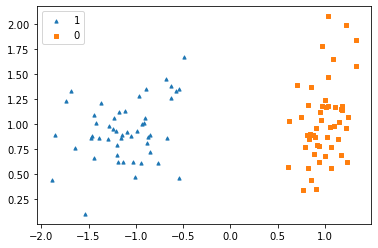

In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)
 
data = pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'y':y})
print(data.head())
print(data.tail())
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

one = data.loc[y == 1]
zero = data.loc[y == 0]

plt.scatter(one.iloc[:, 0], one.iloc[:, 1], s=10, marker = '^', label='1')
plt.scatter(zero.iloc[:, 0], zero.iloc[:, 1], s=10, marker = 's', label='0')
plt.legend()
plt.show()

In [6]:
##Reinizzializzo ad ogni implementazione
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]

model2 = LogisticRegression()
parameters = model2.fit(X, y)
print(parameters)

# x_values = [np.min(X[:, 1]), np.max(X[:, 2])]
# y_values = -(parameters[0]+np.dot(parameters[1], x_values))/parameters[2]

# plt.plot(x_values, y_values, label='Decision Boundary')
# plt.scatter(one.iloc[:, 0], one.iloc[:, 1], s=10, label='0')
# plt.scatter(zero.iloc[:, 0], zero.iloc[:, 1], s=10, label='1')
# plt.legend()



LogisticRegression()


<ipython-input-6-4ac7911e965e>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
